# LDA - Linear Discriminant Analysis - binar/ 2 clase
## Baza de date - recunoastere obiecte - ImgTstObjClassif_lab10_11


In [1]:
import os  
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../_PyUtilFcts/')
import ColorSpaceFunctions as clsFcts

# functia pentru formarea vectorului de trasaturi
def ImgFeatExtr(fileName, rszFct, clSpCod,imgComps):
    # citire imagine si conversie BGR to RGB
    imgRGB = cv2.cvtColor(cv2.imread(fileName) , cv2.COLOR_BGR2RGB) 
    newShape = (int(imgRGB.shape[0]*rszFct),int(imgRGB.shape[1]*rszFct))
    imgRsz = cv2.resize(imgRGB, newShape, interpolation = cv2.INTER_NEAREST)
    if (NewColorSpace=='R/G/B'):
        ImgClrSp = imgRsz
    elif (NewColorSpace=='gray'):
        ImgClrSp = cv2.cvtColor(imgRsz , cv2.COLOR_RGB2GRAY) 
    else:
        ImgClrSp = clsFcts.ConvertColorSpace(imgRsz, 'R/G/B' , NewColorSpace)
    ImgClrSp = ImgClrSp/255
    if (NewColorSpace=='gray'):
        Img1D = np.reshape(ImgClrSp[:,:],(ImgClrSp.shape[0]*ImgClrSp.shape[1],))
    else:
        Img1D = np.reshape(ImgClrSp[:,:,imgComps],(ImgClrSp.shape[0]*ImgClrSp.shape[1] *imgComps.shape[0],))
    # plt.imshow(imgRsz); plt.show();
    return Img1D
    

In [3]:
# Setare parametrii
# Setare director imagini - subdirectoare pe obiecte 
# - 10 exemple pentru fiecare obiect cu ~40 views 
    
pathData = '/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstObjClassif_lab10_11/'

# Folosim clasificatoare binare - clasificam doar 2 obiecte odata
# Numele celor doua obiecte 
#objName = ['apple','pear'] 
#objName = ['apple','tomato'] 
# objName = ['apple','cow'] 
objName = ['horse','cow'] 
# objName = ['horse','dog'] 

# Imaginile obiect se redimensioneaza - miscsoreaza
#   in clasificare folosim varianta redusa
#   se vor testa 0.1/ 0.15/ 0.25/ 0.75 
ResizeFactor = 0.75 # valoare intre [0,1] - pentru micsorare imagine

# Setare numar de imagini care vor fi considerate la testare 
# (retul imaginilor vor fi utilizare la antrenare)
test_size = 0.7     # 0.3 / 0.5 / 0.7 

# Setare spatiu de culoare in care este reprezentata imaginea
SelClrSp = 1 # ['R/G/B' = 0, 'Y/Cr/Cb' = 1, 'H/S/V' = 2, 'L/a/b' = 3] 

# Setare componete  pentru spatiu de culoare care se considera in clasificare
#imgComps = np.array([0]) #  se considera doar C = 0, componenta Y pentru YCrCb
imgComps = np.array([0, 1, 2]) # [C1 = 0, C2 = 1, C3 = 2]

In [4]:

ColorSpacesList = ['R/G/B', 'Y/Cr/Cb', 'H/S/V', 'L/a/b', 'gray'] 
NewColorSpace = ColorSpacesList[SelClrSp] 

print('\n Spatiu de culoare utilizat: '+ NewColorSpace)
print(' Componente utilizate: ', np.array(NewColorSpace.split('/'))[imgComps])
print(' Imaginile vor fi redimensionate/ miscsorate cu factorul de: ', ResizeFactor)
print(' Clasele considerate: ', objName)


 Spatiu de culoare utilizat: Y/Cr/Cb
 Componente utilizate:  ['Y' 'Cr' 'Cb']
 Imaginile vor fi redimensionate/ miscsorate cu factorul de:  0.75
 Clasele considerate:  ['horse', 'cow']


In [5]:
# In[3] Citire imagini si organizare set de date pentru antrenare/testare
# Fiecare imagine este reprezentata sub forma unui vector de trasaturi 1D, pentru clasificare

# Citim toate imaginile din directorul pathTrn 
# care contin cele 2 obiecte/clase din objName 
# fiecare obiect are mai multe directoare fiecare cu ~40 views/ obiect 
x = []; y=[]; 
for i in range(0,len(objName)): #consideram fiecare forma
    for j in range(1,11): # nr de imagini pentru fiecare forma
        dirName = pathData + objName[i] + str(j)
        dirFiles = os.listdir(dirName)      #all filenames of that particular dir -- image
        for k in range(0,len(dirFiles)):
            fileName = dirName+"/"+dirFiles[k]
            if (os.path.isfile(fileName)):
                imgFeat1D = ImgFeatExtr(fileName, ResizeFactor, NewColorSpace, imgComps)
                x.append(imgFeat1D)
                y.append(i)

# X vectorul de trasaturi 
X = np.asarray(x) 
# y vector cu labelurile fiecarei imagini
y = np.asarray(y) 

print(' X.shape: ', X.shape)

 X.shape:  (820, 27648)


In [6]:
# In[4] Applying LDA - clasificator binar
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics

# divizare date in set de antrenare si set de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)

# stepTrn = 3 # Date antreanre - extragere tot a stepTrn imagine
# vlsTrn= range(0,X.shape[0],stepTrn)
# X_train = X[vlsTrn,:] # extragere valori set antrenare
# y_train = y[vlsTrn]   # extragere etichete
# # Selectie date test (cele ramase)
# X_test = np.delete(X, vlsTrn, axis=0); y_test = np.delete(y, vlsTrn, axis=0)
print(' Setul de date este impartit: ', X_train.shape[0],' train, ',  X_test.shape[0],' test' )

 Setul de date este impartit:  246  train,  574  test


In [7]:
# Reducerea spatiului de trasaturi la 1D prin aplicare LDA
# - fiecare imagine este reprezentata print-o singura valoare
model_lda = LDA(n_components = 1)
X_train_lda = model_lda.fit_transform(X_train, y_train)
X_test_lda = model_lda.transform(X_test)


In [8]:
# Daca proiectia imaginii este pozitiva => face parte din clasa 1
# Daca proiectia imaginii este negativa => face parte din clasa 1
# Etichetare set antrenare
y_predTrn = np.zeros(X_train_lda.shape[0],) 
y_predTrn[ np.where(X_train_lda>0) [0] ] = 1

# Etichetare set test
y_predTst = np.zeros(X_test_lda.shape[0],) 
y_predTst[ np.where(X_test_lda>0) [0] ] = 1


 ---- Setul de antrenare ------- 
 LDA - Accuracy:  91.869918699187
 Confusion Matrix pe setul de antrenare: 
 [[116  12]
 [  8 110]]

 ---- Setul de testare ------- 
 LDA - Accuracy:  84.66898954703834
 Confusion Matrix pe setul de testare: 
 [[227  55]
 [ 33 259]]

 ---------------------------------- 
 Afisare proiectii 1D a imaginilor 
  * rosu clasa 1, albastru clasa 2 - reprezentare usor deplasata pentru vizibilitate  
       - sus setul de imagini de la antrenare (reprezentat prin stea) 
       - jos setul de imagini de la de testare (reprezentat prin punct)


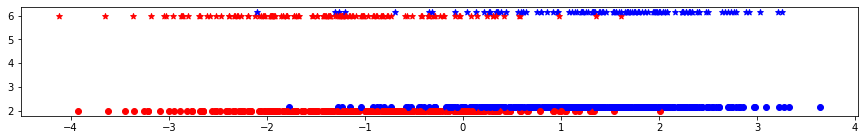

In [9]:
print('\n ---- Setul de antrenare ------- ')
print(' LDA - Accuracy: ', metrics.accuracy_score(y_train, y_predTrn)* 100)
print(' Confusion Matrix pe setul de antrenare: \n', metrics.confusion_matrix(y_train,y_predTrn))
print('\n ---- Setul de testare ------- ')
print(' LDA - Accuracy: ', metrics.accuracy_score(y_test, y_predTst) * 100)
print(' Confusion Matrix pe setul de testare: \n', metrics.confusion_matrix(y_test,y_predTst))

print('\n ---------------------------------- ')
print(' Afisare proiectii 1D a imaginilor ')
print('  * rosu clasa 1, albastru clasa 2 - reprezentare usor deplasata pentru vizibilitate  ')
print('       - sus setul de imagini de la antrenare (reprezentat prin stea) ')
print('       - jos setul de imagini de la de testare (reprezentat prin punct)')

clabel = ['red', 'blue']
fig = plt.figure(figsize=(15,2))

for i in range(0,X_test_lda.shape[0]):
    plt.scatter(X_test_lda[i,0],2+0.15*y_test[i], c=clabel[y_test[i]], marker='o')

# fig = plt.figure(figsize=(15,1))
for i in range(0,X_train_lda.shape[0]):
    plt.scatter(X_train_lda[i,0],6+0.15*y_train[i], c=clabel[y_train[i]], marker='*')

plt.show()